# Лабораторная работа №2

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Описание набора данных "Опрос американского сообщества":
Набор данных ACS предлагает детальное исследование социально-экономической динамики в Соединенных Штатах. С акцентом на доход, занятость, образование и демографию, он дает ценную информацию о гражданстве, языке, на котором говорят дома, семейном положении, инвалидности и квартале рождения».


income: Годовой доход.
employment: Статус занятости.
hrs_work: Количество отработанных часов в неделю.
race: Раса.
age: Возраст в годах.
gender: Пол.
citizen: статус гражданства США.
time_to_work: Время в пути на работу в минутах.
lang: Язык, на котором говорят дома.
married: Семейное положение.
edu: Уровень образования.
disability: Статус инвалидности.
birth_qrtr: Четверть года рождения человека (например, с января по март).


## Загрузка и первичный анализ данных


In [2]:
data = pd.read_csv('acs.csv', sep=",")

In [3]:
data.shape

(2000, 13)

In [4]:
# типы колонок
data.dtypes

income          float64
employment       object
hrs_work        float64
race             object
age               int64
gender           object
citizen          object
time_to_work    float64
lang             object
married          object
edu              object
disability       object
birth_qrtr       object
dtype: object

In [5]:
data.replace('NA', np.nan, inplace=True)

In [6]:
data.head(5)

,income,employment,hrs_work,race,age,gender,citizen,time_to_work,lang,married,edu,disability,birth_qrtr
0,60000.0,not in labor force,40.0,white,68,female,yes,NaN,english,no,college,no,jul thru sep
1,0.0,not in labor force,NaN,white,88,male,yes,NaN,english,no,hs or lower,yes,jan thru mar
2,NaN,NaN,NaN,white,12,female,yes,NaN,english,no,hs or lower,no,oct thru dec
3,0.0,not in labor force,NaN,white,17,male,yes,NaN,other,no,hs or lower,no,oct thru dec
4,0.0,not in labor force,NaN,white,77,female,yes,NaN,other,no,hs or lower,yes,jul thru sep


In [7]:
# кол-во пропущенные значений (тк нулевые значения в данном датасете - конкретное значения)
nan_count = (data.isna().sum())
print(nan_count)

income           377
employment       395
hrs_work        1041
race               0
age                0
gender             0
citizen            0
time_to_work    1217
lang             105
married            0
edu               58
disability         0
birth_qrtr         0
dtype: int64


In [8]:
total_cnt = data.shape[0]
print('Всего строк: {}'.format(total_cnt))

Всего строк: 2000


## Обработка пропусков в данных

In [9]:
data.head(10)

,income,employment,hrs_work,race,age,gender,citizen,time_to_work,lang,married,edu,disability,birth_qrtr
0,60000.0,not in labor force,40.0,white,68,female,yes,NaN,english,no,college,no,jul thru sep
1,0.0,not in labor force,NaN,white,88,male,yes,NaN,english,no,hs or lower,yes,jan thru mar
2,NaN,NaN,NaN,white,12,female,yes,NaN,english,no,hs or lower,no,oct thru dec
3,0.0,not in labor force,NaN,white,17,male,yes,NaN,other,no,hs or lower,no,oct thru dec
4,0.0,not in labor force,NaN,white,77,female,yes,NaN,other,no,hs or lower,yes,jul thru sep
5,1700.0,employed,40.0,other,35,female,yes,15.0,other,yes,hs or lower,yes,jul thru sep
6,NaN,NaN,NaN,white,11,male,yes,NaN,english,no,hs or lower,no,oct thru dec
7,NaN,NaN,NaN,other,7,male,yes,NaN,english,no,hs or lower,yes,jul thru sep
8,NaN,NaN,NaN,asian,6,male,yes,NaN,other,no,hs or lower,no,jan thru mar
9,45000.0,employed,84.0,white,27,male,yes,40.0,english,yes,hs or lower,no,oct thru dec


In [10]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((2000, 13), (2000, 7))

In [11]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((2000, 13), (783, 13))

In [12]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно,
# так как нулями заполняются в том числе категориальные признаки
# (напр, lang), см. 39 строку датасета
print(data[39:45])

      income          employment  hrs_work   race  age  gender citizen  \
39       NaN                 NaN       NaN  black    3  female     yes   
40       0.0  not in labor force       NaN  white   63  female     yes   
41   19000.0            employed      70.0  white   28    male     yes   
42   50000.0            employed      45.0  asian   48    male     yes   
43   85000.0            employed      50.0  white   33    male     yes   
44  100000.0            employed      40.0  white   27    male     yes   

    time_to_work     lang married          edu disability    birth_qrtr  
39           NaN      NaN      no  hs or lower         no  apr thru jun  
40           NaN  english     yes  hs or lower         no  oct thru dec  
41           3.0    other     yes  hs or lower         no  jan thru mar  
42          40.0  english     yes         grad         no  jul thru sep  
43          65.0  english     yes      college         no  jan thru mar  
44          45.0  english     yes    

In [13]:
data_new_3 = data.fillna(0)
print(data_new_3[39:45])

      income          employment  hrs_work   race  age  gender citizen  \
39       0.0                   0       0.0  black    3  female     yes   
40       0.0  not in labor force       0.0  white   63  female     yes   
41   19000.0            employed      70.0  white   28    male     yes   
42   50000.0            employed      45.0  asian   48    male     yes   
43   85000.0            employed      50.0  white   33    male     yes   
44  100000.0            employed      40.0  white   27    male     yes   

    time_to_work     lang married          edu disability    birth_qrtr  
39           0.0        0      no  hs or lower         no  apr thru jun  
40           0.0  english     yes  hs or lower         no  oct thru dec  
41           3.0    other     yes  hs or lower         no  jan thru mar  
42          40.0  english     yes         grad         no  jul thru sep  
43          65.0  english     yes      college         no  jan thru mar  
44          45.0  english     yes    

## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [14]:
# Выберем числовые колнки с пропущенными значениями
num_cols = []
for col in data.columns:
    # кол-во пустых значений
    null_cnt = data[data[col].isna()].shape[0]
    dt = str(data[col].dtype)
    if null_cnt>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        perc = round((null_cnt / data.shape[0])*100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, null_cnt, perc))

Колонка income. Тип данных float64. Количество пустых значений 377, 18.85%.
Колонка hrs_work. Тип данных float64. Количество пустых значений 1041, 52.05%.
Колонка time_to_work. Тип данных float64. Количество пустых значений 1217, 60.85%.


In [15]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,income,hrs_work,time_to_work
0,60000.0,40.0,NaN
1,0.0,NaN,NaN
2,NaN,NaN,NaN
3,0.0,NaN,NaN
4,0.0,NaN,NaN
...,...,...,...
1995,0.0,NaN,NaN
1996,0.0,NaN,NaN
1997,70000.0,40.0,30.0
1998,105000.0,50.0,30.0


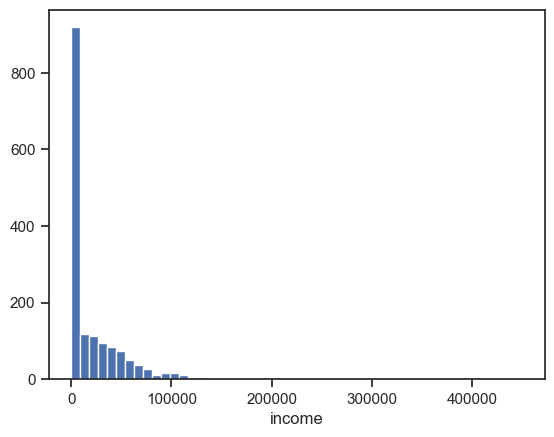

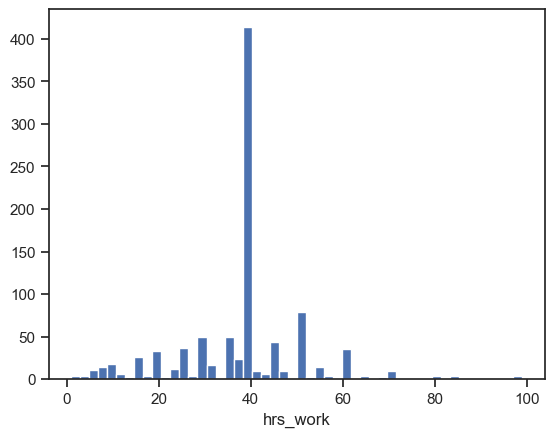

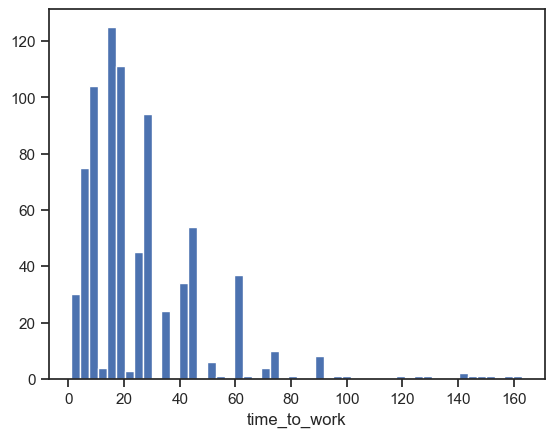

In [16]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [18]:
data_num_income = data_num[['income']]
data_num_income.head(5)

,income
0,60000.0
1,0.0
2,NaN
3,0.0
4,0.0


In [19]:
# Фильтр для проверки заполнения пустых значений
indicators = MissingIndicator()
mask_missing_values_only = indicators.fit_transform(data_num_income)
mask_missing_values_only

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [20]:
strategies=['mean', 'median', 'most_frequent']

In [21]:
def test_num_inpute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_income)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_inpute(strategies[0])

('mean',
 array([23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571, 23599.98151571,
        23599.98151571, 23599.98151571, 23599.98151571,

In [23]:
# импьютация по "mean"
data_num_income_1 = data_num[['income']]
data_num_1 = data_num

imputer = SimpleImputer(strategy='mean')
data_num_1 = imputer.fit_transform(data_num_income_1)
print(data_num_income.head(5))
print("---------------------------------------------------")
print(data_num_income_1.head(5))

    income
0  60000.0
1      0.0
2      NaN
3      0.0
4      0.0
---------------------------------------------------
    income
0  60000.0
1      0.0
2      NaN
3      0.0
4      0.0


In [24]:
strategies[1], test_num_inpute(strategies[1])

('median',
 array([3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
        3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 30

In [25]:
strategies[2], test_num_inpute(strategies[2])

('most_frequent',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [26]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [27]:
data[['time_to_work']].describe()

,time_to_work
count,783.000000
mean,25.997446
std,22.290973
min,1.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,163.000000


In [28]:
test_num_impute_col(data, 'time_to_work', strategies[0])

('time_to_work', 'mean', 1217, 25.997445721583652, 25.997445721583652)

In [29]:
test_num_impute_col(data, 'time_to_work', strategies[1])

('time_to_work', 'median', 1217, 20.0, 20.0)

In [30]:
test_num_impute_col(data, 'time_to_work', strategies[2])

('time_to_work', 'most_frequent', 1217, 15.0, 15.0)

## Обработка пропусков в категориальных данных


In [31]:
# напр, виден пропуск в столбцах "employment","lang"
data[37:42]

,income,employment,hrs_work,race,age,gender,citizen,time_to_work,lang,married,edu,disability,birth_qrtr
37,15000.0,employed,8.0,white,20,female,yes,NaN,english,no,hs or lower,no,oct thru dec
38,31000.0,employed,40.0,white,32,female,yes,35.0,english,yes,hs or lower,no,oct thru dec
39,NaN,NaN,NaN,black,3,female,yes,NaN,NaN,no,hs or lower,no,apr thru jun
40,0.0,not in labor force,NaN,white,63,female,yes,NaN,english,yes,hs or lower,no,oct thru dec
41,19000.0,employed,70.0,white,28,male,yes,3.0,other,yes,hs or lower,no,jan thru mar


In [32]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    null_cnt = data[data[col].isna()].shape[0]
    dt = str(data[col].dtype)
    if null_cnt>0 and (dt=='object'):
        cat_cols.append(col)
        perc = round((null_cnt / data.shape[0])*100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, null_cnt, perc))

Колонка employment. Тип данных object. Количество пустых значений 395, 19.75%.
Колонка lang. Тип данных object. Количество пустых значений 105, 5.25%.
Колонка edu. Тип данных object. Количество пустых значений 58, 2.9%.


In [33]:
cat_temp_data = data[['employment']]
cat_temp_data.head()

,employment
0,not in labor force
1,not in labor force
2,NaN
3,not in labor force
4,not in labor force


In [34]:
cat_temp_data['employment'].unique()

array(['not in labor force', nan, 'employed', 'unemployed'], dtype=object)

In [35]:
cat_temp_data[cat_temp_data['employment'].isnull()].shape

(395, 1)

In [36]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['not in labor force'],
       ['not in labor force'],
       ['employed'],
       ...,
       ['employed'],
       ['employed'],
       ['unemployed']], dtype=object)

In [37]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['employed', 'not in labor force', 'unemployed'], dtype=object)

## Масштабирование данных


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['hrs_work']])

plt.hist(data['hrs_work'], 50)
plt.show()

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['hrs_work']])

plt.hist(sc2_data, 50)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()

# Применение LabelEncoder к категориальному признаку 'employment'
cat_temp_data['employment_encoded'] = label_encoder.fit_transform(cat_temp_data['employment'])

cat_temp_data[['employment', 'employment_encoded']]

C:\Users\dasha\AppData\Local\Temp\ipykernel_19488\1874722391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_temp_data['employment_encoded'] = label_encoder.fit_transform(cat_temp_data['employment'])


,employment,employment_encoded
0,not in labor force,1
1,not in labor force,1
2,NaN,3
3,not in labor force,1
4,not in labor force,1
...,...,...
1995,not in labor force,1
1996,not in labor force,1
1997,employed,0
1998,employed,0
